## Part 2. Data Modeling

### Content:
[1. EDA (Exploratory Data Analysis)](#part1)

[2. Modeling](#part2)



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # for ineractive plotting
from datetime import datetime, timedelta


In [22]:
df=pd.read_csv('Data_for_model.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   member_name                   1456 non-null   object 
 1   dep_time                      1456 non-null   object 
 2   arr_time                      1456 non-null   object 
 3   temperature_depart            1456 non-null   float64
 4   temperature_arr               1456 non-null   float64
 5   member_at_home                1456 non-null   bool   
 6   arr_date                      1456 non-null   object 
 7   dep_date                      1456 non-null   object 
 8   num_at_home                   1456 non-null   int64  
 9   comfortable_temp              1456 non-null   int64  
 10  last_departure_time           1456 non-null   object 
 11  first_arrive_time             1456 non-null   object 
 12  thermostat_status             1456 non-null   object 
 13  the

In [23]:
df.sample(4)

,member_name,dep_time,arr_time,temperature_depart,temperature_arr,member_at_home,arr_date,dep_date,num_at_home,comfortable_temp,last_departure_time,first_arrive_time,thermostat_status,thermostat_temp_control,latitude,longitude,distance_out,temperature_distance_control,transport,time_to_home
234,Nika,2022-08-23 07:01:00,2022-08-23 14:30:00,18.459957,18.390166,False,2022-08-23,2022-08-23,1,20,2022-08-23 09:55:00,2022-08-23 13:30:00,on,on,49.0504,122.3045,50922.7,on,car,4629.3
359,Nika,2022-12-26 08:30:00,2022-12-26 21:40:00,19.100695,17.991470,False,2022-12-26,2022-12-26,0,15,2022-12-26 09:55:00,2022-12-26 14:20:00,off,off,49.2827,122.8490,50922.7,off,walk,50922.7
815,Kirill,2022-03-29 06:50:00,2022-03-29 19:05:00,19.822214,19.362506,False,2022-03-29,2022-03-29,1,20,2022-03-29 08:10:00,2022-03-29 12:50:00,on,on,49.2827,122.8490,11192.2,on,walk,11192.2
735,Kirill,2022-01-08 07:01:00,2022-01-08 18:20:00,20.990225,19.473037,False,2022-01-08,2022-01-08,0,15,2022-01-08 08:30:00,2022-01-08 18:20:00,off,off,49.2827,122.8490,11192.2,off,walk,11192.2


In [24]:
#check null data. If False - no null data
df.isna().sum().any()

False

In [25]:
df.shape

(1456, 20)

In [26]:
#run describe function to understand our continuos variables
df.describe()

,temperature_depart,temperature_arr,num_at_home,comfortable_temp,latitude,longitude,distance_out,time_to_home
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,19.838918,19.764893,0.796703,18.090659,49.201275,122.818400,19424.775000,6781.500000
std,0.990703,0.996728,0.746964,2.430057,0.089492,0.311605,18486.543849,12128.225816
min,16.530267,16.398486,0.000000,15.000000,49.050400,122.304500,3576.800000,198.700000
25%,19.179352,19.102910,0.000000,15.000000,49.181950,122.712875,9288.350000,837.425000
50%,19.829429,19.778188,1.000000,20.000000,49.236000,122.926450,11599.800000,2813.500000
75%,20.484862,20.442598,1.000000,20.000000,49.255325,123.031975,21736.225000,6270.025000
max,22.613164,23.481918,3.000000,20.000000,49.282700,123.116200,50922.700000,50922.700000


**Conclusion**
 - In our dataset there are 20 columns (variables) and 1456 rows 
 - In our dataset there are categorical and continuous data as well 
 - No null data
 
**Next steps**
  - Explore our data and prerare all variables for modeling

## 1. EDA (Exploratory Data Analysis)
<a class='anchor' id = 'part1'></a>
- look at the data distribution for continuous and categorical data
- prepare data to modeling (all variables must have numeric format)
- consider correlation between data

### 1.1 Convert variables into numeric format

In [27]:
#bool to int for member_at_home column
df['member_at_home']=df['member_at_home'].map({False:0, True:1})
df['member_at_home'].value_counts()

0    1166
1     290
Name: member_at_home, dtype: int64

In [28]:
#object to time for dep_time, arr_time,last_departure_time,first_arrive_time columns

df['dep_time']=pd.to_datetime(df['dep_time'])
df['arr_time']=pd.to_datetime(df['arr_time'])
df['last_departure_time']=pd.to_datetime(df['last_departure_time'])
df['first_arrive_time']=pd.to_datetime(df['first_arrive_time'])
df['dep_date']=pd.to_datetime(df['dep_date'])
df['arr_date']=pd.to_datetime(df['arr_date'])

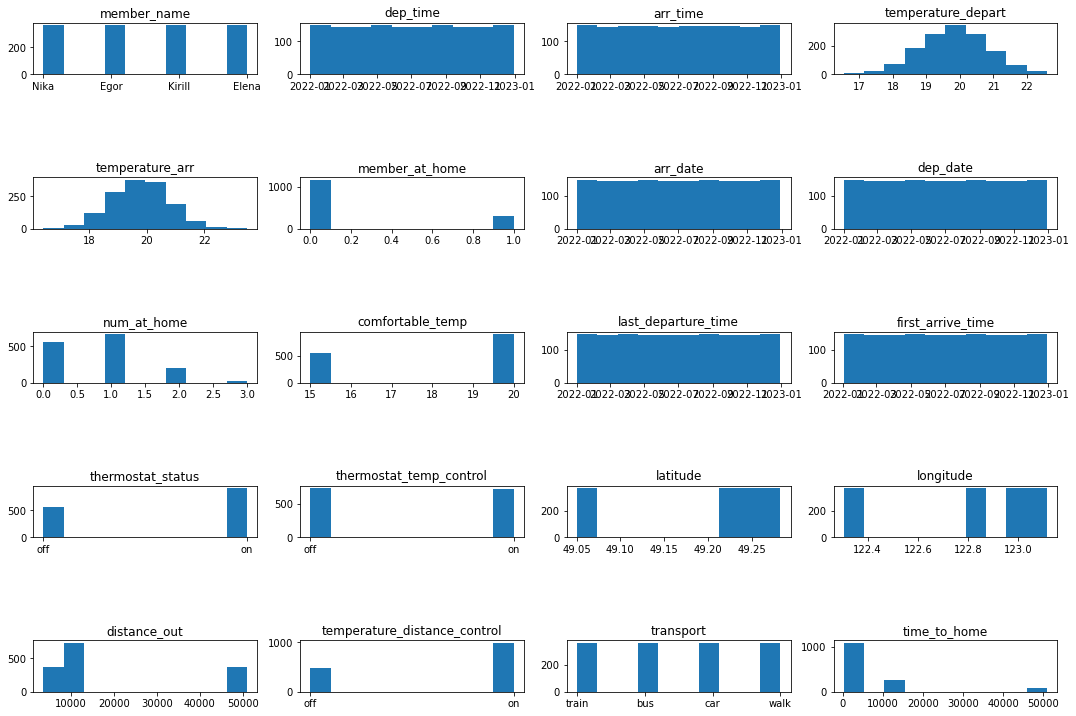

In [29]:
#visualize data distribution
plt. subplots(5,4, figsize=(15,10))

#plotting our destribution

for i, column in enumerate (df.columns,1):
    plt.subplot(5,4,i)
    plt.hist(df[column])
    plt.title(column)
    plt.tight_layout(pad=0.9, w_pad=0.5, h_pad=7.0)
    

In [30]:
#object to int for temperature_distance_control, thermostat_status, temperature_distance_control columns
df['temperature_distance_control']=df['temperature_distance_control'].map({'on':1, 'off':0})
df['thermostat_status']=df['thermostat_status'].map({'on':1, 'off':0})
df['thermostat_temp_control']=df['thermostat_temp_control'].map({'on':1, 'off':0})
df['temperature_distance_control'].value_counts()

1    986
0    470
Name: temperature_distance_control, dtype: int64

In [31]:
#object to int for transport and member_name

df['member_name']=df['member_name'].map({'Elena':1, 'Kirill':2, 'Egor':3, 'Nika':4})
df['transport']=df['transport'].map({'walk':1, 'car':2, 'train':3, 'bus':4})

In [32]:
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   member_name                   1456 non-null   int64         
 1   dep_time                      1456 non-null   datetime64[ns]
 2   arr_time                      1456 non-null   datetime64[ns]
 3   temperature_depart            1456 non-null   float64       
 4   temperature_arr               1456 non-null   float64       
 5   member_at_home                1456 non-null   int64         
 6   arr_date                      1456 non-null   datetime64[ns]
 7   dep_date                      1456 non-null   datetime64[ns]
 8   num_at_home                   1456 non-null   int64         
 9   comfortable_temp              1456 non-null   int64         
 10  last_departure_time           1456 non-null   datetime64[ns]
 11  first_arrive_time             

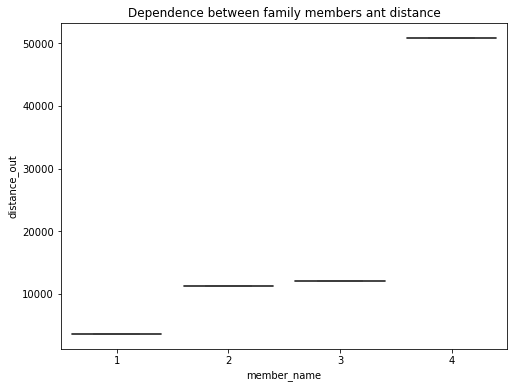

In [33]:
#look at relationship between members and distance
fig, ax = plt.subplots()
plt.title('Dependence between family members ant distance')
fig.set_size_inches((8,6))
sns.boxplot(x='member_name',y='distance_out',data=df,ax=ax)
plt.show()

In [34]:
#separate days and hours for beter understanding the relationship between departure and arrival time of members
df['day_dep'] = df['dep_date'].dt.day.astype('int64')
df['day_arr'] = df['arr_date'].dt.day.astype('int64')
df['month_dep'] = df['dep_date'].dt.month.astype('int64')
df['month_arr'] = df['arr_date'].dt.month.astype('int64')
df['hour_dep'] = df['dep_time'].dt.strftime('%H').astype('int64')
df['hour_arr'] = df['arr_time'].dt.strftime('%H').astype('int64')
df['last_departure_time_h']=df['last_departure_time'].dt.strftime('%H').astype('int64')
df['first_arrive_time_h']=df['first_arrive_time'].dt.strftime('%H').astype('int64')

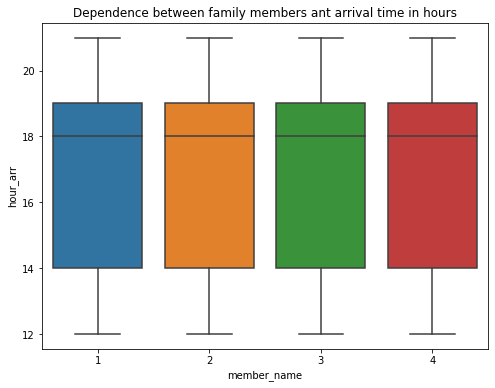

In [35]:
#look at relationship between members and arrival time
fig, ax = plt.subplots()
plt.title('Dependence between family members ant arrival time in hours')
fig.set_size_inches((8,6))
sns.boxplot(x='member_name',y='hour_arr',data=df,ax=ax)
plt.show()

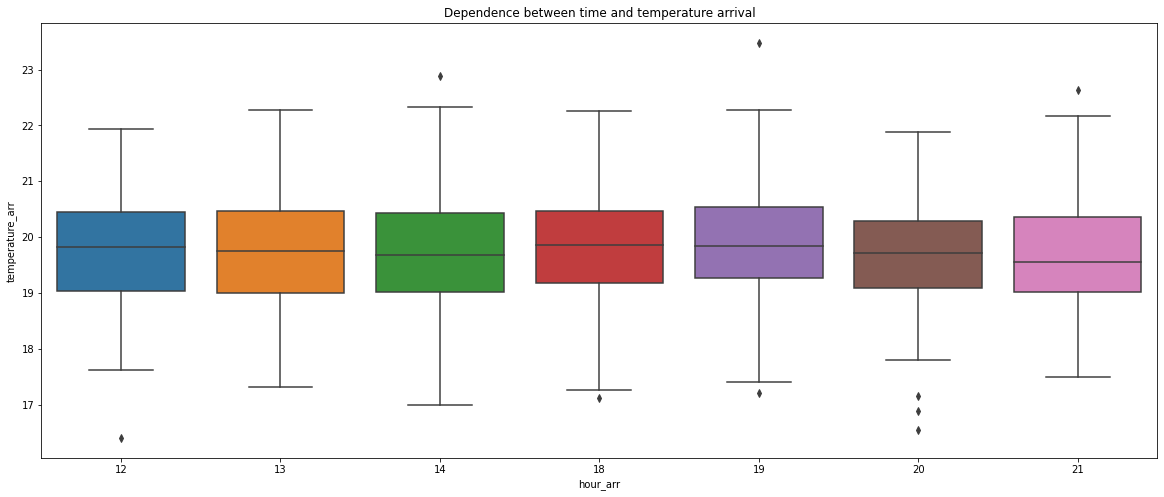

In [36]:
#look at relationship between hours and temperature arrival
fig, ax = plt.subplots()
fig.set_size_inches((20,8))
plt.title('Dependence between time and temperature arrival')
sns.boxplot(x='hour_arr',y='temperature_arr',data=df,ax=ax)
plt.show()

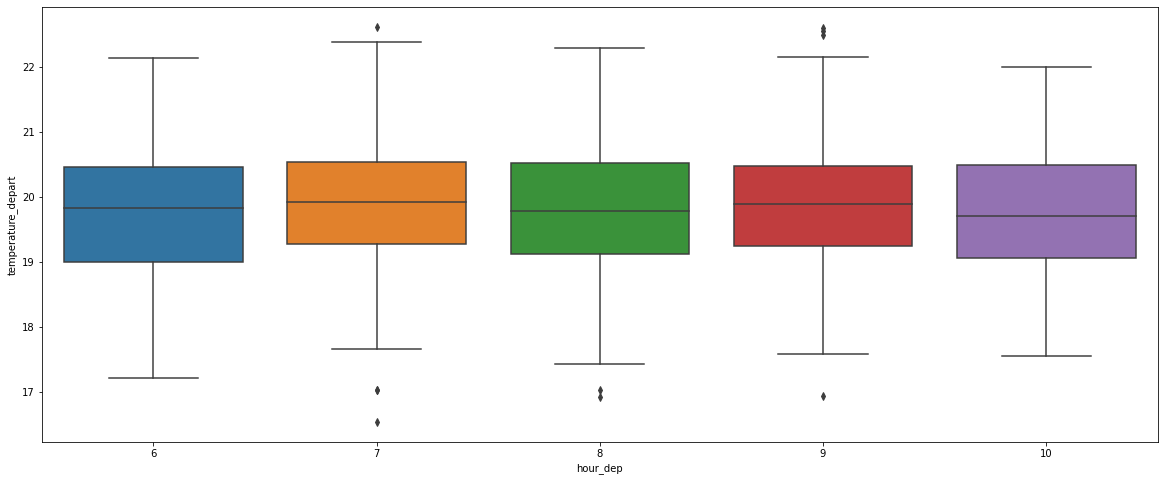

In [37]:
#look at relationship between hours and temperature departure
fig, ax = plt.subplots()
fig.set_size_inches((20,8))
sns.boxplot(x='hour_dep',y='temperature_depart',data=df,ax=ax)
plt.show()

In [39]:
df['temperature_depart'].value_counts(bins=[13, 15, 20, 30])

(15.0, 20.0]      811
(20.0, 30.0]      645
(12.999, 15.0]      0
Name: temperature_depart, dtype: int64

In [40]:
df['temperature_arr'].value_counts(bins=[13, 15, 20, 30])

(15.0, 20.0]      856
(20.0, 30.0]      600
(12.999, 15.0]      0
Name: temperature_arr, dtype: int64

<AxesSubplot:xlabel='hour_dep', ylabel='num_at_home'>

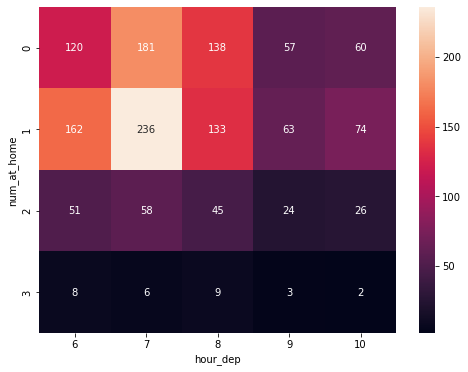

In [41]:
#consider relationships between number of people at home and departure time
plt.figure(figsize=(8, 6))
result_crosstab1=pd.crosstab(df['num_at_home'],df['hour_dep'])
sns.heatmap(result_crosstab1, annot=True, fmt='g')

<AxesSubplot:xlabel='hour_arr', ylabel='num_at_home'>

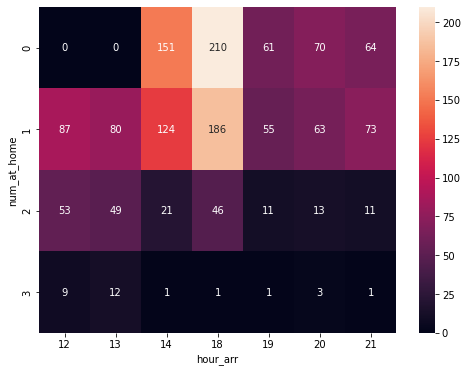

In [42]:
#consider relationships between number of people at home and arrival time
plt.figure(figsize=(8, 6))
result_crosstab2=pd.crosstab(df['num_at_home'],df['hour_arr'])
sns.heatmap(result_crosstab2, annot=True, fmt='g')

<AxesSubplot:xlabel='last_departure_time_h', ylabel='thermostat_temp_control'>

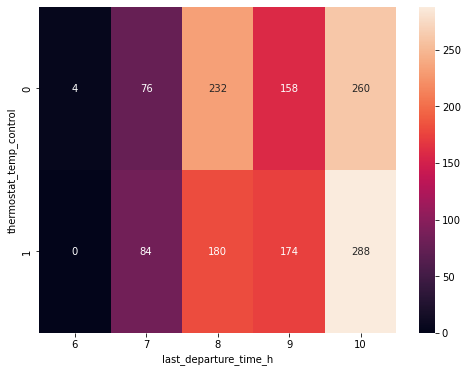

In [43]:
#consider relationships between last departure time and thermostat temperature control
plt.figure(figsize=(8, 6))
result_crosstab3=pd.crosstab(df['thermostat_temp_control'],df['last_departure_time_h'])
sns.heatmap(result_crosstab3, annot=True, fmt='g')


<AxesSubplot:xlabel='first_arrive_time_h', ylabel='thermostat_temp_control'>

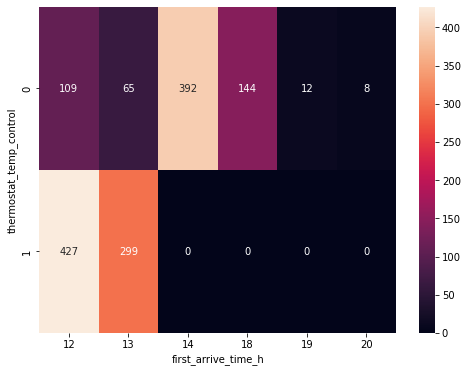

In [44]:
#consider relationships between first arrive time and thermostat temperature control
plt.figure(figsize=(8, 6))
result_crosstab4=pd.crosstab(df['thermostat_temp_control'],df['first_arrive_time_h'])
sns.heatmap(result_crosstab4, annot=True, fmt='g')

<AxesSubplot:title={'center':'Dependence between number of people at home and comfortable temperature'}, xlabel='num_at_home', ylabel='comfortable_temp'>

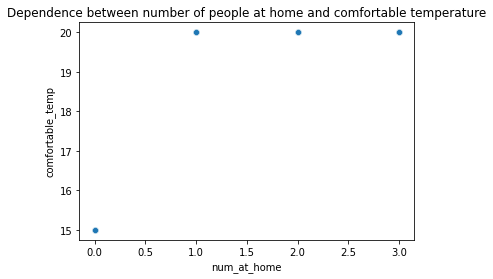

In [45]:
#look at relationship between number of people at home and comfortable temperature
fig.set_size_inches((20,8))
plt.title('Dependence between number of people at home and comfortable temperature')
sns.scatterplot(data=df, x="num_at_home", y="comfortable_temp")

<AxesSubplot:title={'center':'Dependence between distance and time to reach home'}, xlabel='distance_out', ylabel='time_to_home'>

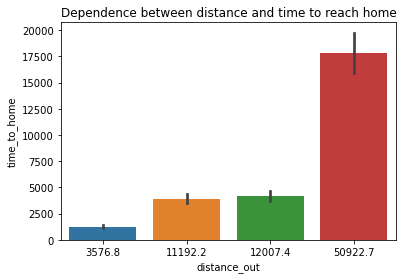

In [46]:
#look at relationship between distance and time to reach home
fig.set_size_inches((20,8))
plt.title('Dependence between distance and time to reach home')
sns.barplot(data=df, x="distance_out", y="time_to_home")

### 1.2. Analyze correlation between variables and find the most important variables for this model

 - use Logistic regression for this task

In [10]:
X=df.drop(columns=['temperature_distance_control'])
y=df['temperature_distance_control']

In [23]:
X.shape
y.shape

(1456,)

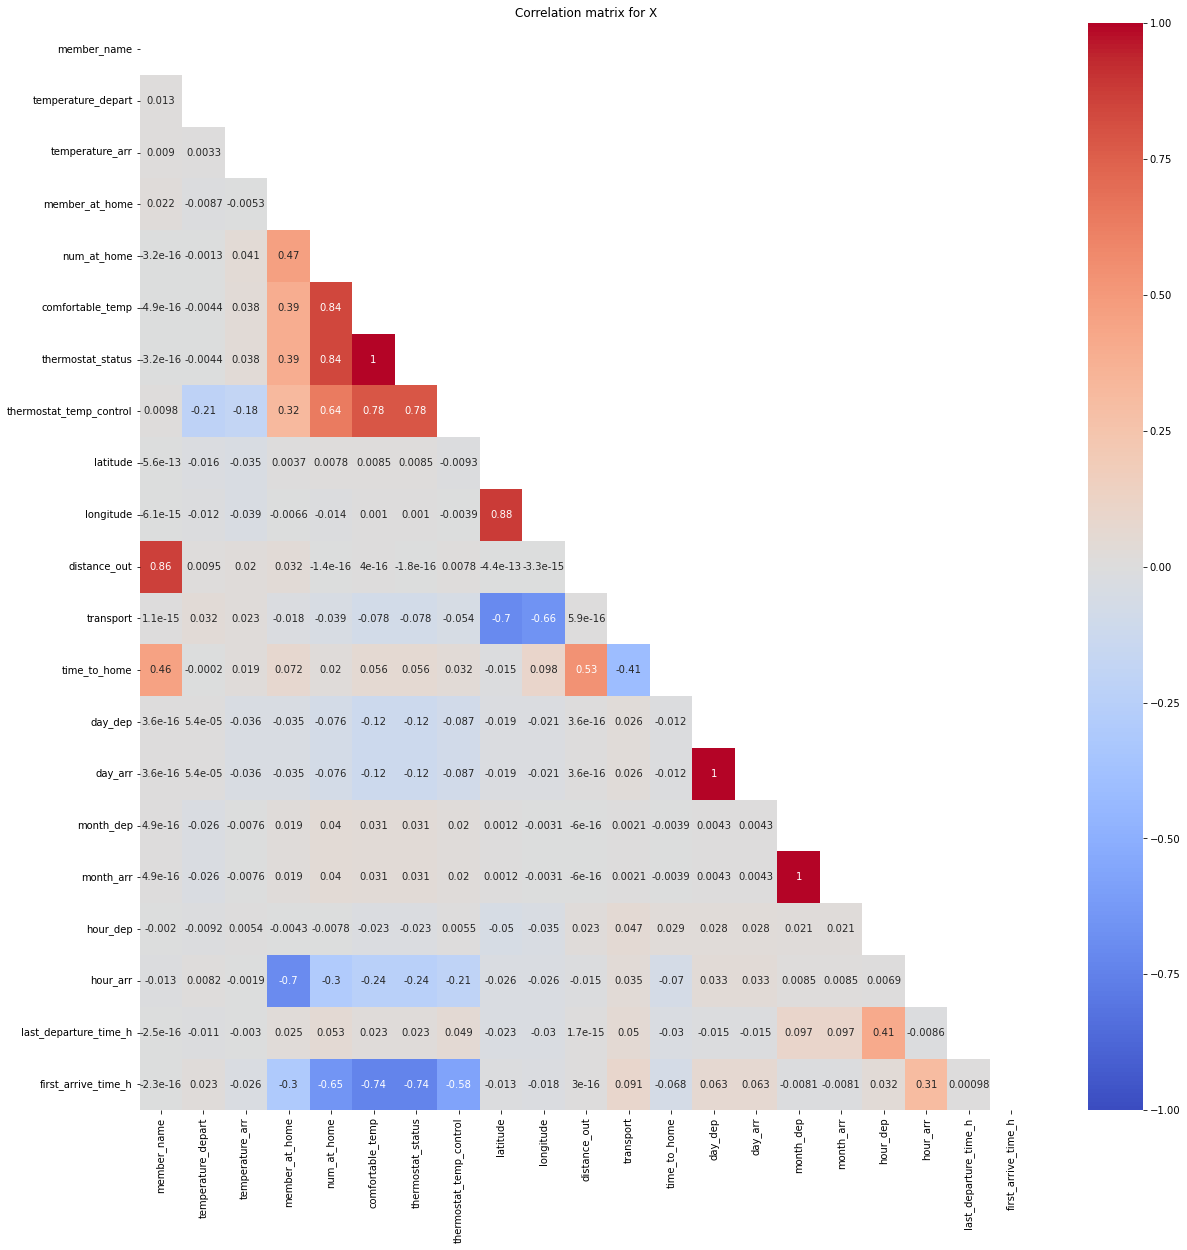

In [11]:
#correlation matrix
plt.figure(figsize=(20,20))
matrix=np.triu(X.corr())
plt.title('Correlation matrix for X')
sns.heatmap(X.corr(), annot=True, mask=matrix, cmap='coolwarm',vmin = -1.0,vmax=1.0)
plt.show()


In [12]:
#drop all variables with correlation more than 70%
X_1=X.drop(columns=['thermostat_status','comfortable_temp','distance_out','month_dep', 'day_arr'])
X_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   member_name              1456 non-null   int64         
 1   dep_time                 1456 non-null   datetime64[ns]
 2   arr_time                 1456 non-null   datetime64[ns]
 3   temperature_depart       1456 non-null   float64       
 4   temperature_arr          1456 non-null   float64       
 5   member_at_home           1456 non-null   int64         
 6   arr_date                 1456 non-null   datetime64[ns]
 7   dep_date                 1456 non-null   datetime64[ns]
 8   num_at_home              1456 non-null   int64         
 9   last_departure_time      1456 non-null   datetime64[ns]
 10  first_arrive_time        1456 non-null   datetime64[ns]
 11  thermostat_temp_control  1456 non-null   int64         
 12  latitude                 1456 non-

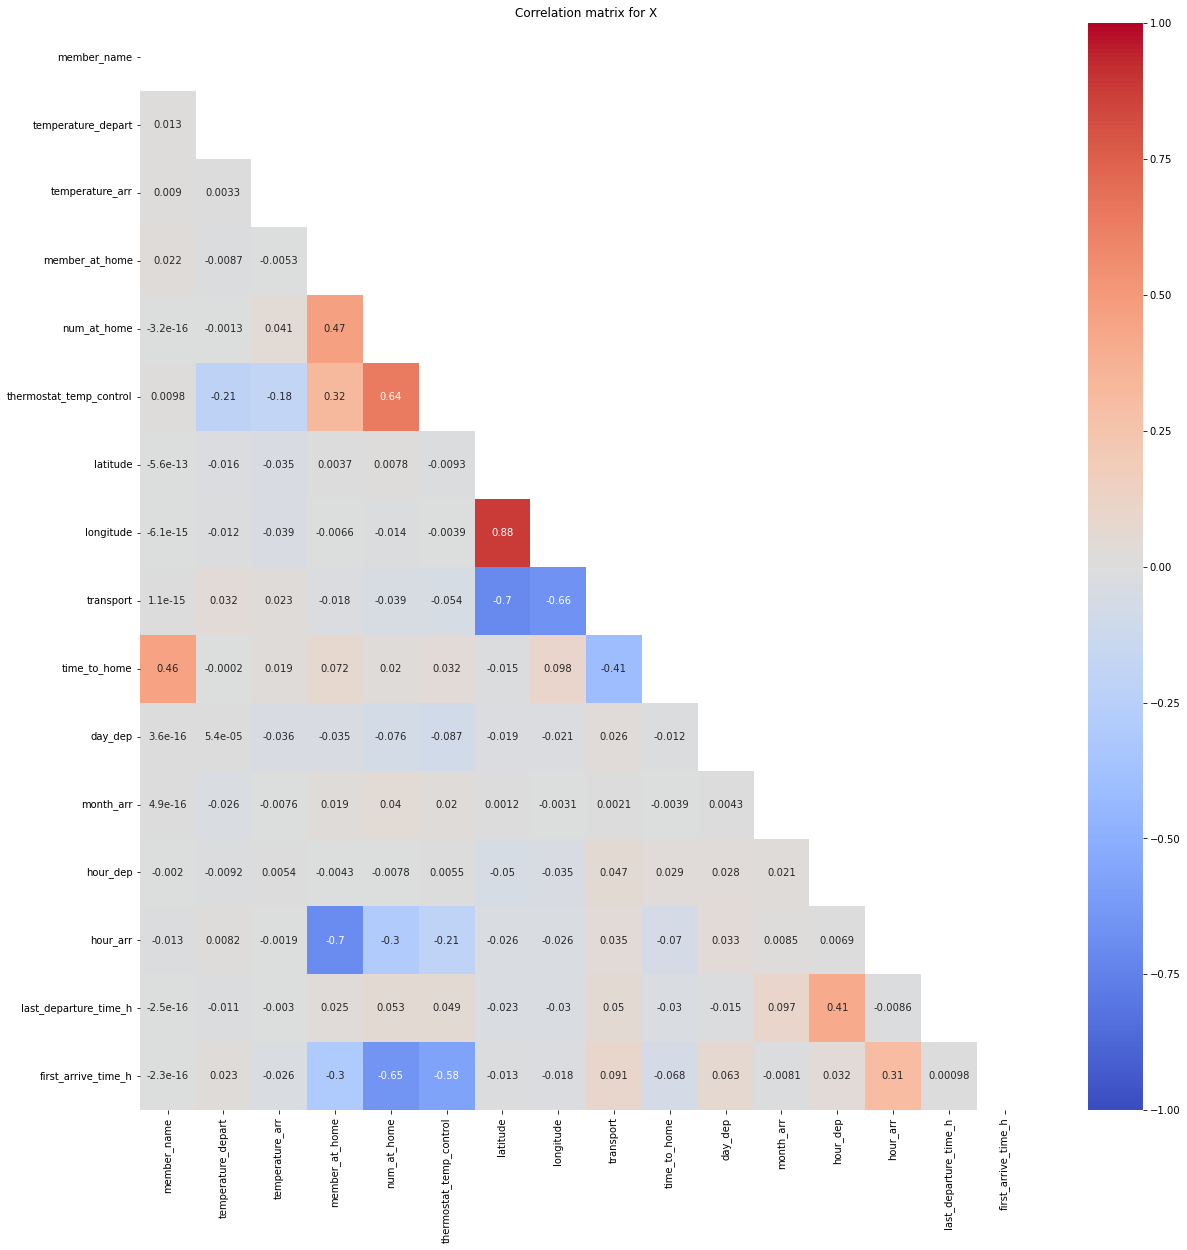

In [13]:
#correlation matrix
plt.figure(figsize=(20,20))
matrix=np.triu(X_1.corr())
plt.title('Correlation matrix for X')
sns.heatmap(X_1.corr(), annot=True, mask=matrix, cmap='coolwarm',vmin = -1.0,vmax=1.0)
plt.show()


In [14]:
#drop all columns with non numirical format because we created the same variables in numeric format before
X_2=X_1.drop(columns=['first_arrive_time', 'last_departure_time','dep_date', 'arr_date','arr_time','dep_time'])
X_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_name              1456 non-null   int64  
 1   temperature_depart       1456 non-null   float64
 2   temperature_arr          1456 non-null   float64
 3   member_at_home           1456 non-null   int64  
 4   num_at_home              1456 non-null   int64  
 5   thermostat_temp_control  1456 non-null   int64  
 6   latitude                 1456 non-null   float64
 7   longitude                1456 non-null   float64
 8   transport                1456 non-null   int64  
 9   time_to_home             1456 non-null   float64
 10  day_dep                  1456 non-null   int64  
 11  month_arr                1456 non-null   int64  
 12  hour_dep                 1456 non-null   int64  
 13  hour_arr                 1456 non-null   int64  
 14  last_departure_time_h   

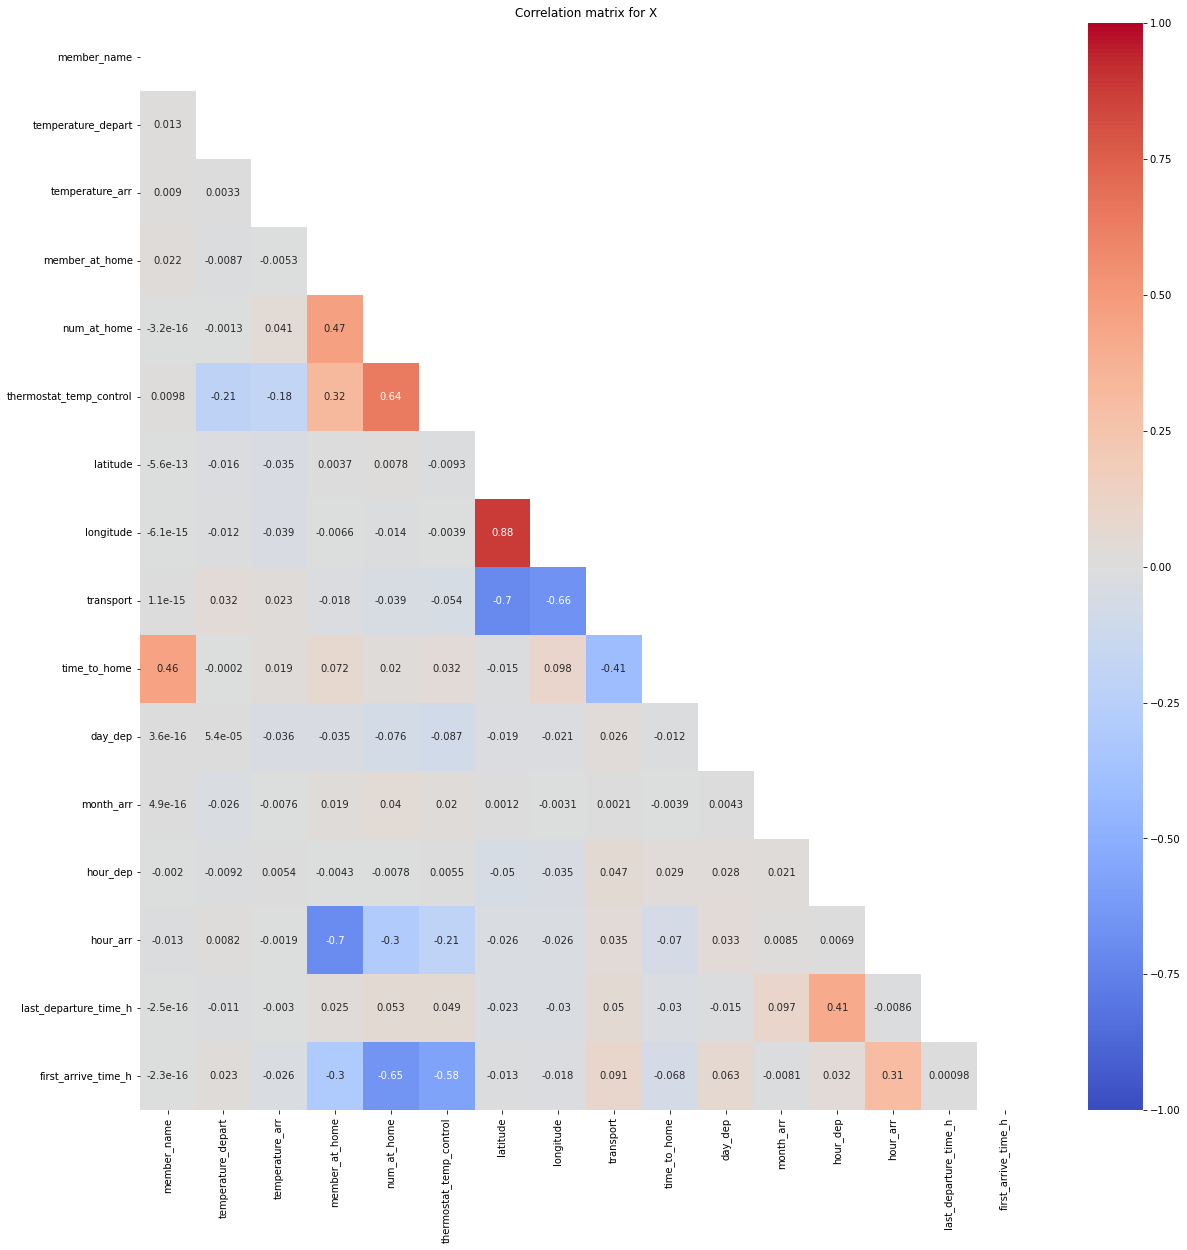

In [15]:
plt.figure(figsize=(20,20))
matrix=np.triu(X_2.corr())
plt.title('Correlation matrix for X')
sns.heatmap(X_2.corr(), annot=True, mask=matrix, cmap='coolwarm',vmin = -1.0,vmax=1.0)
plt.show()


In [16]:
X_3=X_2.drop(columns=['transport','thermostat_temp_control','longitude','num_at_home'])
X_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   member_name            1456 non-null   int64  
 1   temperature_depart     1456 non-null   float64
 2   temperature_arr        1456 non-null   float64
 3   member_at_home         1456 non-null   int64  
 4   latitude               1456 non-null   float64
 5   time_to_home           1456 non-null   float64
 6   day_dep                1456 non-null   int64  
 7   month_arr              1456 non-null   int64  
 8   hour_dep               1456 non-null   int64  
 9   hour_arr               1456 non-null   int64  
 10  last_departure_time_h  1456 non-null   int64  
 11  first_arrive_time_h    1456 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 136.6 KB


### Run logistic regression for X_2

In [17]:
from scipy import stats
import statsmodels.api as sm #for regressions
from collections import Counter
from scipy.stats import norm #used for plotting

#Model 1.1 

# 1. add constant
X_const = sm.add_constant(X_3)

# 2.Instalate model
logit=sm.Logit(y,X_const)
# 3. Fit model
logit_fitted=logit.fit()

logit_fitted.summary()

         Current function value: 0.310142
         Iterations: 35


/Users/Elena/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                                
========================================================================================
Dep. Variable:     temperature_distance_control   No. Observations:                 1456
Model:                                    Logit   Df Residuals:                     1443
Method:                                     MLE   Df Model:                           12
Date:                          Thu, 11 May 2023   Pseudo R-squ.:                  0.5069
Time:                                  13:15:47   Log-Likelihood:                -451.57
converged:                                False   LL-Null:                       -915.77
Covariance Type:                      nonrobust   LLR p-value:                4.550e-191
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    17.7935     47.065      0.378      0.705     -74.453     110.039
member_name              -0.7859      0.090     -8.697      0.000      -0.963      -0.609
temperature_depart       -0.0123      0.084     -0.147      0.883      -0.177       0.152
temperature_arr          -0.3733      0.086     -4.347      0.000      -0.542      -0.205
member_at_home           17.7569    690.438      0.026      0.979   -1335.476    1370.990
latitude                  0.2051      0.951      0.216      0.829      -1.660       2.070
time_to_home           1.484e-05   7.37e-06      2.014      0.044    3.97e-07    2.93e-05
day_dep                  -0.0165      0.010     -1.699      0.089      -0.036       0.003
month_arr                 0.0025      0.024      0.105      0.916      -0.044       0.049
hour_dep                  0.0331      0.073      0.454      0.650      -0.110       0.176
hour_arr                  0.1265      0.033      3.832      0.000       0.062       0.191
last_departure_time_h    -0.0086      0.086     -0.100      0.921      -0.178       0.161
first_arrive_time_h      -1.4812      0.109    -13.597      0.000      -1.695      -1.268
=========================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [18]:
#Calculate accuracy for Model 1.1
#use logistic regration to make some evaluations
y_proba=logit_fitted.predict(X_const)

#convert soft prediction to hard 0s or 1s
y_pred=np.where(y_proba>=0.5,1,0)

#calculate number of correct prediction
num_correct=(y_pred==y).sum()

#calculate the percentage accuracy
pct_accuracy=num_correct/X_2.shape[0]

#print accuracy
print('Accuracy is:', np.round(pct_accuracy*100.0,2))

Accuracy is: 89.84


In [19]:
#drop features with p>0.05 because they are statistically signifficant

#Model 1.2
#1.First drop the variable 
X_4=X_3.drop(columns=['member_at_home','month_arr','latitude'])

# 2. add constant
X_const1 = sm.add_constant(X_4)

# 3.Instalate model
logit1=sm.Logit(y,X_const1)

# 4. Fit model
logit_fitted1=logit1.fit()

logit_fitted1.summary()

Optimization terminated successfully.
         Current function value: 0.342029
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                                
========================================================================================
Dep. Variable:     temperature_distance_control   No. Observations:                 1456
Model:                                    Logit   Df Residuals:                     1446
Method:                                     MLE   Df Model:                            9
Date:                          Thu, 11 May 2023   Pseudo R-squ.:                  0.4562
Time:                                  13:15:52   Log-Likelihood:                -497.99
converged:                                 True   LL-Null:                       -915.77
Covariance Type:                      nonrobust   LLR p-value:                4.708e-174
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    33.4033      3.073     10.870      0.000      27.381      39.426
member_name              -0.7202      0.085     -8.451      0.000      -0.887      -0.553
temperature_depart       -0.0144      0.082     -0.176      0.860      -0.174       0.145
temperature_arr          -0.3418      0.082     -4.193      0.000      -0.502      -0.182
time_to_home           1.467e-05   6.72e-06      2.181      0.029    1.49e-06    2.78e-05
day_dep                  -0.0157      0.009     -1.698      0.089      -0.034       0.002
hour_dep                  0.0297      0.071      0.421      0.673      -0.109       0.168
hour_arr                 -0.0185      0.028     -0.658      0.511      -0.074       0.037
last_departure_time_h    -0.0064      0.083     -0.078      0.938      -0.168       0.155
first_arrive_time_h      -1.7456      0.114    -15.270      0.000      -1.970      -1.522
=========================================================================================
"""

In [20]:
#Calculate accuracy for Model 1.2
#use logistic regration to make some evaluations
y_proba1=logit_fitted1.predict(X_const1)

#convert soft prediction to hard 0s or 1s
y_pred=np.where(y_proba>=0.5,1,0)

#calculate number of correct prediction
num_correct=(y_pred==y).sum()

#calculate the percentage accuracy
pct_accuracy=num_correct/X_2.shape[0]

#print accuracy
print('Accuracy is:', np.round(pct_accuracy*100.0,2))

Accuracy is: 89.84


In [21]:
#Model 1.3
#1.First drop the variable 
X_5=X_4.drop(columns=['last_departure_time_h','hour_dep','temperature_depart','hour_arr','day_dep'])

# 2. add constant
X_const2 = sm.add_constant(X_5)

# 3.Instalate model
logit2=sm.Logit(y,X_const2)

# 4. Fit model
logit_fitted2=logit2.fit()

logit_fitted2.summary()

Optimization terminated successfully.
         Current function value: 0.343273
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                                
========================================================================================
Dep. Variable:     temperature_distance_control   No. Observations:                 1456
Model:                                    Logit   Df Residuals:                     1451
Method:                                     MLE   Df Model:                            4
Date:                          Thu, 11 May 2023   Pseudo R-squ.:                  0.4542
Time:                                  13:15:59   Log-Likelihood:                -499.81
converged:                                 True   LL-Null:                       -915.77
Covariance Type:                      nonrobust   LLR p-value:                9.299e-179
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.9255      2.439     13.499      0.000      28.145      37.706
member_name            -0.7208      0.085     -8.477      0.000      -0.887      -0.554
temperature_arr        -0.3361      0.081     -4.146      0.000      -0.495      -0.177
time_to_home         1.537e-05   6.66e-06      2.309      0.021    2.32e-06    2.84e-05
first_arrive_time_h    -1.7695      0.113    -15.601      0.000      -1.992      -1.547
=======================================================================================
"""

In [22]:
#Calculate accuracy for Model 1.3
#use logistic regration to make some evaluations
y_proba2=logit_fitted2.predict(X_const2)

#convert soft prediction to hard 0s or 1s
y_pred=np.where(y_proba>=0.5,1,0)

#calculate number of correct prediction
num_correct=(y_pred==y).sum()

#calculate the percentage accuracy
pct_accuracy=num_correct/X_5.shape[0]

#print accuracy
print('Accuracy is:', np.round(pct_accuracy*100.0,2))

Accuracy is: 89.84


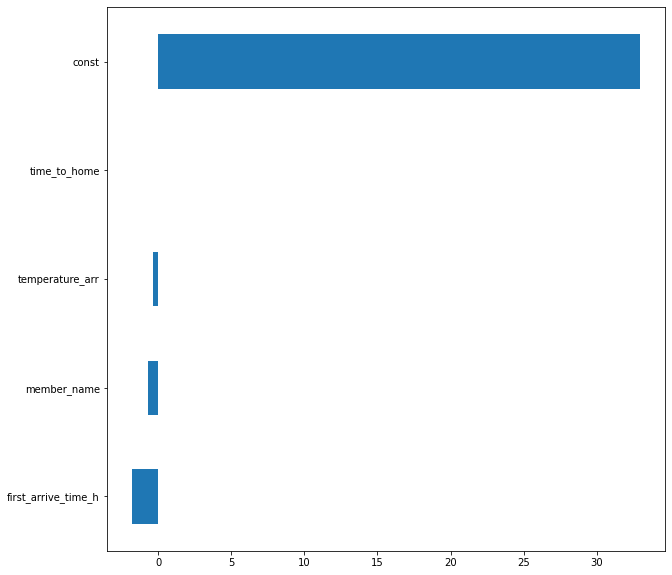

In [36]:
# Model coefficients (i.e. the betas)
plt.figure(figsize=(10,10))
logit_fitted2.params.sort_values().plot(kind='barh')
plt.show()

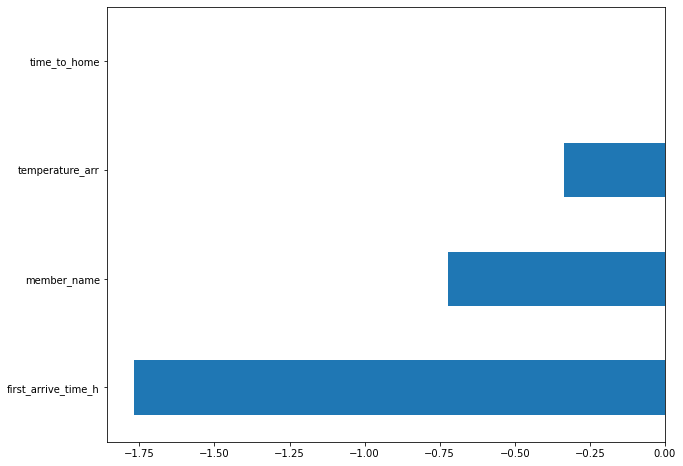

In [23]:
# Influence of Const ia high, so drop const to consider the most important variables
#Model coefficients (i.e. the betas)

params_series = logit_fitted2.params
p_values_series = logit_fitted2.pvalues

significant_params = params_series[p_values_series < 0.05]
significant_params.drop('const', inplace=True)


plt.figure(figsize=(10,8))
significant_params.sort_values().plot(kind='barh')
plt.show()

In [24]:
#create data frame of our coefficients and p-value
coefficients_df = pd.DataFrame({"coef": logit_fitted2.params,
                                "p_value": logit_fitted2.pvalues})
coefficients_df.reset_index(inplace=True)


coefficients_df.rename({'index':'variable'}, axis='columns', inplace=True)
coefficients_df.head()

,variable,coef,p_value
0,const,32.925466,1.578821e-41
1,member_name,-0.720796,2.315619e-17
2,temperature_arr,-0.336066,3.386829e-05
3,time_to_home,0.000015,2.096010e-02
4,first_arrive_time_h,-1.769531,7.221371e-55


In [25]:
categories = []    # Holds labels for bars
sizes = []         # Hold bar heights
colors = []        # Holds bar colors
p_values = []      # Used for additional text within the plot

p_value_color_scale = 1.5

# iterate through
for index, row in coefficients_df.iterrows():
    variable_name = row['variable'].strip()
    
    if (variable_name != 'const'):   # We don't care much for the constant since we can modify it
        
        
        categories.append(variable_name)
        coefficient_value = row['coef']
        
        p_value = round(row['p_value'],2)
        p_values.append(p_value)
        


        color = [1.0,1.0,1.0]
        
        color[1] = (min(p_value_color_scale*p_value, 1.0)/1.0)  # Make GREEN brighter
        
        if (coefficient_value >= 0):
            color[0] = color[1]                     # Make RED brighter
            column_size = np.exp(coefficient_value)
        else:
            color[2] = color[1]                     # Make BLUE brighter
            column_size = -1/np.exp(coefficient_value)

        column_size = round(column_size,2)
        sizes.append(column_size)
        colors.append(color)

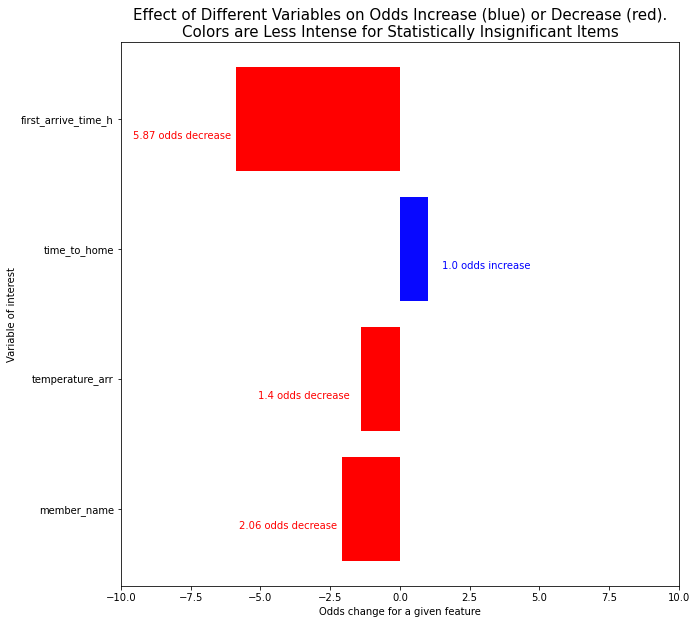

In [26]:
# Let's create a bar chart
fix, ax = plt.subplots(figsize=(10, 10))
ax.barh(categories, sizes, color=colors)
for index, bar_size in enumerate(sizes):
    if (bar_size > 0.0):
        # Add a label text
        ax.text(bar_size + 0.5, index-0.15, f'{bar_size} odds increase', color='blue')
        
        # Add a p-value disclaimer
        if (p_values[index] >= 0.05):
            ax.text(-2.5, index-0.15, f'p-value={p_values[index]}', color='blue')
    else:
        # Label text
        ax.text(bar_size - 3.7, index-0.15, f'{abs(bar_size)} odds decrease', color='red')
        
        # p-value disclaimer
        if (p_values[index] >= 0.05):
            ax.text(0.3, index - 0.15, f'p-value={p_values[index]}', color='red')

# change the limit to make sure labels go inside the plot area
plt.xlim(-10.0, 10.0)
plt.title("Effect of Different Variables on Odds Increase (blue) or Decrease (red).\
\nColors are Less Intense for Statistically Insignificant Items", size=15)
plt.xlabel("Odds change for a given feature", size=10)
plt.ylabel("Variable of interest", size=10)
plt.show()

In [27]:
#Consider forward approach and find an appropriate variables for the next modelling
# Look at correlation between each variable and the target
df.corr()['temperature_distance_control'].sort_values(ascending=False)

temperature_distance_control    1.000000
comfortable_temp                0.878404
thermostat_status               0.878404
num_at_home                     0.736643
thermostat_temp_control         0.688521
member_at_home                  0.344318
month_dep                       0.019710
month_arr                       0.019710
latitude                        0.010710
last_departure_time_h           0.009404
longitude                       0.006718
time_to_home                   -0.001172
hour_dep                       -0.010936
temperature_depart             -0.012415
temperature_arr                -0.058108
transport                      -0.070950
day_dep                        -0.092286
day_arr                        -0.092286
distance_out                   -0.108337
member_name                    -0.169491
hour_arr                       -0.215157
first_arrive_time_h            -0.638767
Name: temperature_distance_control, dtype: float64

In [28]:
X_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   member_name          1456 non-null   int64  
 1   temperature_arr      1456 non-null   float64
 2   time_to_home         1456 non-null   float64
 3   first_arrive_time_h  1456 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 45.6 KB


**Conclusion**
- The dataset was splitted into independent variables and dependent one.
- Finally based on correlation and p-values the most signifficant 4 independent variables (with p-value<0.05) were found that play a crucial role in our dataset

**Next steps**
- Run modeling

## 2. Modeling
<a class='anchor' id = 'part2'></a>

In [14]:
#import all necessary libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm #for regressions

# Scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

# Classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


#model evaluation
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

#for cross validation
from sklearn.model_selection import cross_val_score

#for saving pipeline model
import joblib


np.random.seed(12345)

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

In [44]:
X_5.describe()

,member_name,temperature_arr,time_to_home,first_arrive_time_h
count,1456.000000,1456.000000,1456.000000,1456.000000
mean,2.500000,19.764893,6781.500000,13.483516
std,1.118418,0.996728,12128.225816,1.855910
min,1.000000,16.398486,198.700000,12.000000
25%,1.750000,19.102910,837.425000,12.000000
50%,2.500000,19.778188,2813.500000,13.000000
75%,3.250000,20.442598,6270.025000,14.000000
max,4.000000,23.481918,50922.700000,20.000000


In [30]:
#let's split our data by 80/20 (where test=20%) 
X_train, X_test, y_train, y_test = train_test_split(X_5, y, test_size=0.2, stratify=y, random_state=42)

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164 entries, 464 to 207
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   member_name          1164 non-null   int64  
 1   temperature_arr      1164 non-null   float64
 2   time_to_home         1164 non-null   float64
 3   first_arrive_time_h  1164 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 45.5 KB


In [32]:
# Split our train dataset for train1 and validation set (validation=25%) 
#validation is used to tune a model's hyperparameters
X_train1, X_val, y_train1, y_val =train_test_split(X_train, y_train, test_size = 0.25,
                     random_state=1)

In [48]:
print(f'Shape of X_test set: {X_test.shape}')
print(f'Shape of X_validation set: {X_val.shape}')
print(f'Shape of X_train set: {X_train1.shape}')

Shape of X_test set: (292, 4)
Shape of X_validation set: (291, 4)
Shape of X_train set: (873, 4)


In [33]:
#Scale our data
# Instantiate the scaler
SS = StandardScaler()

# Fit the scaler and transform all data subsets
X_train1_ss = SS.fit_transform(X_train1)
X_val_ss = SS.transform(X_val)
X_test_ss = SS.transform(X_test)

In [50]:
#check
print(X_train1_ss.shape, X_val_ss.shape, X_test_ss.shape)

(873, 4) (291, 4) (292, 4)


### 2.1 Logistic Regression

In [51]:
validation_scores = []
train_scores = []

C_range = np.array([.000001,.00001,.0001,.001,0.1,\
                1,10,100,1000,10000,100000,1000000,10000000])

for c in C_range:
    my_logreg = LogisticRegression(C = c,random_state=1)
    my_logreg.fit(X_train1_ss,y_train1)
    
    # train on traning set
    train_scores.append(my_logreg.score(X_train1_ss,y_train1))
    # score on validation set
    validation_scores.append(my_logreg.score(X_val_ss,y_val))
    

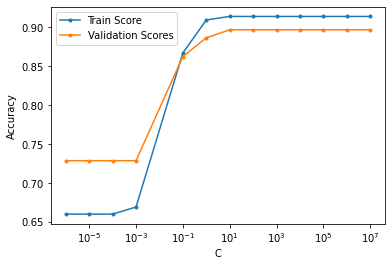

In [52]:
plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='.')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

In [53]:
# find accuracy using C=10
logitL1 = LogisticRegression(C=10, random_state=42)

# Fit
logitL1.fit(X_train1_ss, y_train1)

# Score - on both train and test
print('Train Accuracy')
print(logitL1.score(X_train1_ss, y_train1))
print('Validation Accuracy')
print(logitL1.score(X_val_ss, y_val))

Train Accuracy
0.9140893470790378
Validation Accuracy
0.8969072164948454


In [54]:
#find optimal C value for train and validation sets using L1 penalty
L1_penalty_train = []
L1_penalty_val = []

C_range = np.array([.0000001,.000001,.00001,.0001,.001,0.1,\
                1,10,100,1000,10000,100000,1000000])

for c in C_range:
    my_logreg_L1 = LogisticRegression(C = c,random_state=42,penalty='l1',solver='liblinear')
    my_logreg_L1.fit(X_train1_ss,y_train1)
    
    # train on traning set
    L1_penalty_train.append(my_logreg_L1.score(X_train1_ss,y_train1))
    # score on validation set
    L1_penalty_val.append(my_logreg_L1.score(X_val_ss,y_val))

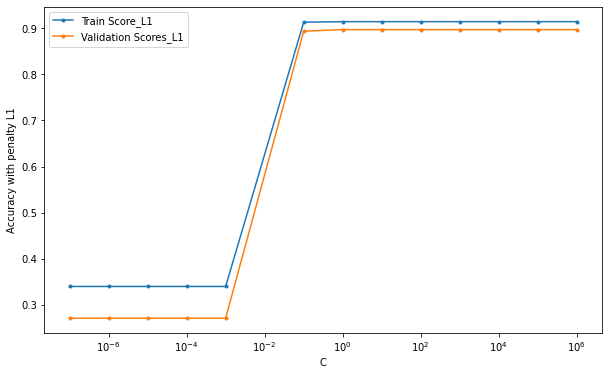

In [55]:
#visualize
plt.figure(figsize=(10,6))
plt.plot(C_range, L1_penalty_train,label="Train Score_L1",marker='.')
plt.plot(C_range, L1_penalty_val,label="Validation Scores_L1",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy with penalty L1')
plt.legend()
plt.show();

In [56]:
# L1 Penalty with C=10
logitL1 = LogisticRegression(penalty='l1', solver='liblinear', C=10, random_state=42)

# Fit
logitL1.fit(X_train1_ss, y_train1)

# Score - on both train and test
print('Train Accuracy')
print(logitL1.score(X_train1_ss, y_train1))
print('Validation Accuracy')
print(logitL1.score(X_val_ss, y_val))

Train Accuracy
0.9140893470790378
Validation Accuracy
0.8969072164948454


In [57]:
#create estimators as a list of tuples: 
#let's take StendardScaler, dimention reducer PCA
#use Logistic regression, L1-regularization and 5-fold cross-validation (cv=5)

estimators = [('normalise', StandardScaler()),
              ('reduce_dim', PCA()),
              ('model', LogisticRegression())]

my_pipe = Pipeline(estimators)

param_grid = [{'normalise': [StandardScaler()],
              'reduce_dim__n_components': [4,3,2],
              'model':[LogisticRegression(solver='liblinear', penalty='l1')],
              'model__C': [.0001,.1,1,10,100,1000]}]

grid = GridSearchCV(my_pipe, param_grid, cv=5)
fittedgrid = grid.fit(X_train1, y_train1)

fittedgrid.best_params_

{'model': LogisticRegression(C=10, penalty='l1', solver='liblinear'),
 'model__C': 10,
 'normalise': StandardScaler(),
 'reduce_dim__n_components': 3}

In [58]:
#put in our estimator C=10, PCA(n_components=3) and L1 penalty, cv=5
estimators = [('normalise', StandardScaler()),
              ('reduce_dim', PCA(n_components=3)),
              ('model', LogisticRegression(penalty='l1', solver='liblinear', C=10))]

my_pipe_correct = Pipeline(estimators)

#5-fold cross validation
score = cross_val_score(my_pipe_correct, X_train1, y_train1, cv=5)

#fit model
my_pipe_correct.fit(X_train1, y_train1)

#accuracy score
train_pipe=my_pipe_correct.score(X_train1, y_train1)
val_pipe=my_pipe_correct.score(X_val, y_val)

print(f'Accuracies for 5 folds separately: {score}')
print(f'Average Accuracy for 5 folds: {np.mean(score)}')
print(f'Train Accuracy: {train_pipe}')
print(f'Validation Accuracy: {val_pipe}')

Accuracies for 5 folds separately: [0.92       0.90285714 0.90857143 0.92528736 0.93103448]
Average Accuracy for 5 folds: 0.9175500821018062
Train Accuracy: 0.9198167239404352
Validation Accuracy: 0.9003436426116839


In [59]:
#Confusion matrix
# Get class predictions
y_val_pred = my_pipe_correct.predict(X_val)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_val, y_val_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted switch off", "Predicted switch on"],
    index=["True switch off", "True switch on"]
)

display(cf_df)

,Predicted switch off,Predicted switch on
True switch off,60,19
True switch on,10,202


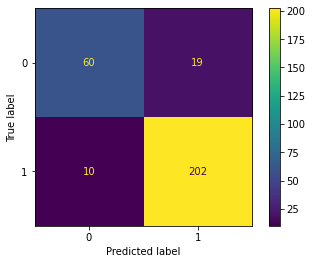

In [60]:
# visualize our confusion matrix
plt.rcParams["axes.grid"] = False
plot_confusion_matrix(my_pipe_correct, X_val, y_val);

In [61]:
#build a classification report and find recall, precision and f1-score
report_initial = classification_report(y_val, y_val_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        79
           1       0.91      0.95      0.93       212

    accuracy                           0.90       291
   macro avg       0.89      0.86      0.87       291
weighted avg       0.90      0.90      0.90       291



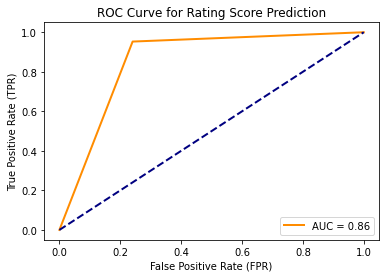

Area under curve (AUC):0.8561619297826606



In [62]:
#look at the AUC score

fprs, tprs, thresholds = roc_curve(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred)

plt.figure()
plt.plot(fprs, tprs, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Rating Score Prediction')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC):{roc_auc}')
print()

### 2.2 Random Forest

In [63]:
#test which n_estimator parameter gives the best result
#take the max_depth=5

n_estimator_values = np.arange(1, 10, 2)

results_df = pd.DataFrame(columns=["n", "train score", "validation score"])

# loop over different values for the estimators
for n in n_estimator_values:
    print(f"Fitting with n={n}...", end="\r")
    
    # initialize the model
    my_random_forest = RandomForestClassifier(n_estimators=n, max_depth=3, random_state=0)
    
    # fit on train 
    #we shouldn't use scaled model, because it's a kind of decision tree model
    my_random_forest.fit(X_train1, y_train1)
    
    # score
    train_score = my_random_forest.score(X_train1, y_train1)
    validation_score = my_random_forest.score(X_val, y_val)
    
    # append to results df
    results_df = results_df.append({
        "n": n,
        "train score": train_score,
        "validation score": validation_score
    }, ignore_index=True)

<AxesSubplot:xlabel='n'>

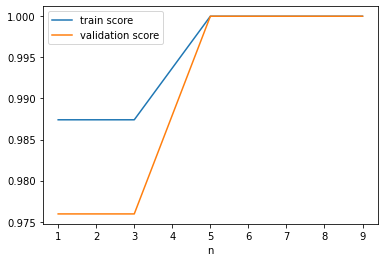

In [64]:
results_df.set_index("n").plot(kind="line")

In [65]:
#put in our estimator n_estimators=5, PCA(n_components=3), max_depth=3, cv=5
estimators = [('normalise', StandardScaler()),
              ('reduce_dim', PCA(n_components=4)),
              ('model', RandomForestClassifier(n_estimators=5, max_depth=4, random_state=0))]

my_pipe_correct_tree = Pipeline(estimators)

#5-fold cross validation
score = cross_val_score(my_pipe_correct_tree, X_train1, y_train1, cv=5)

#fit model
my_pipe_correct_tree.fit(X_train1, y_train1)

#accuracy score
train_pipe_tree=my_pipe_correct_tree.score(X_train1, y_train1)
val_pipe_tree=my_pipe_correct_tree.score(X_val, y_val)

print(f'Accuracies for 5 folds separately: {score}')
print(f'Average Accuracy for 5 folds: {np.mean(score)}')
print(f'Train Accuracy: {train_pipe_tree}')
print(f'Validation Accuracy: {val_pipe_tree}')

Accuracies for 5 folds separately: [0.91428571 0.94285714 0.92571429 0.94827586 0.90804598]
Average Accuracy for 5 folds: 0.9278357963875206
Train Accuracy: 0.9518900343642611
Validation Accuracy: 0.9450171821305842


In [66]:
#confusion matrix
# Get class predictions
y_val_pred_tree = my_pipe_correct_tree.predict(X_val)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_val, y_val_pred_tree)

report_initial_tree = classification_report(y_val, y_val_pred_tree)
print(report_initial_tree)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        79
           1       0.96      0.97      0.96       212

    accuracy                           0.95       291
   macro avg       0.93      0.93      0.93       291
weighted avg       0.94      0.95      0.94       291



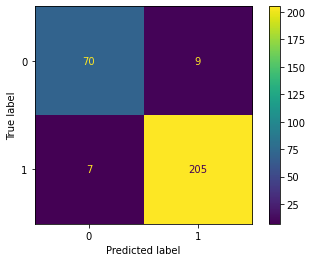

In [67]:
# visualize our confusion matrix 
plt.rcParams["axes.grid"] = False
plot_confusion_matrix(my_pipe_correct_tree, X_val, y_val);

In [68]:
data=pd.Series(my_pipe_correct_tree.named_steps['model'].feature_importances_,X_train1.columns).sort_values(ascending=False)
data

temperature_arr        0.399188
time_to_home           0.345147
member_name            0.138315
first_arrive_time_h    0.117349
dtype: float64

In [69]:
def plot_feature_importances(model):
    n_features = X_train1_ss.shape[1]
    plt.figure(figsize=(10,8))
    #plt.bar(range(n_features),model.feature_importances_, align="center")
    plt.bar(range(n_features), my_pipe_correct_tree.named_steps['model'].feature_importances_,align="center")
    plt.xticks(np.arange(n_features))
    plt.ylabel("importance")
    plt.xlabel("features")
    plt.title("Features Importances")
    plt.show()

In [70]:
# retrieving the RF Classifier from the model pipeline
clf = my_pipe_correct_tree[-1]
# making a pandas dataframe
data = list(zip(X_train1.columns, clf.feature_importances_))

df_importances = pd.DataFrame(data, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False).head(9)
df_importances

,Feature,Importance
1,temperature_arr,0.399188
2,time_to_home,0.345147
0,member_name,0.138315
3,first_arrive_time_h,0.117349


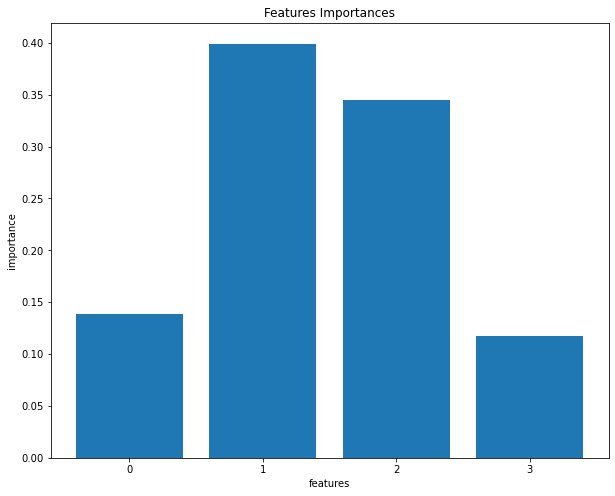

In [290]:
plot_feature_importances(df_importances)

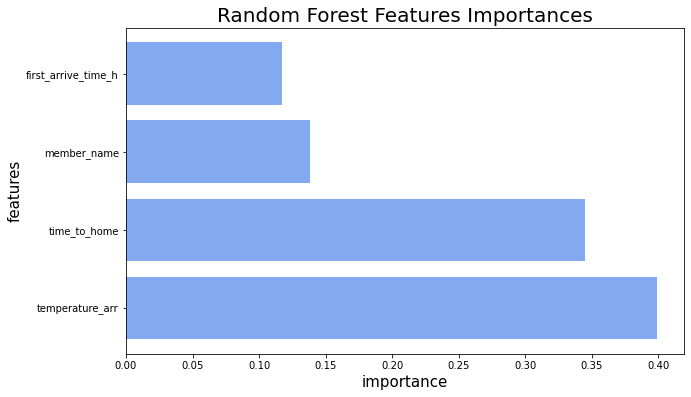

In [71]:
plt.figure(figsize=(10,6))
plt.rcParams["axes.grid"] = False

plt.barh(df_importances['Feature'], df_importances['Importance'], data=df_importances, align="center", color='cornflowerblue', alpha=0.8)
plt.xlabel("importance", size=15)
plt.ylabel("features", size=15)
plt.title("Random Forest Features Importances", size=20)
plt.show()

In [72]:
#X_5.to_csv('X.csv', index=False)

In [73]:
#y.to_csv('y.csv', index=False)

### 2.3 XG Boosting

In [34]:
#put in our estimator n_estimators=70, max_depth=4, learning_rate=0.1, 
#Add cross-validation cv=5 
estimators = [('normalise', StandardScaler()),
              ('reduce_dim', PCA(n_components=4)),
               ('model', XGBClassifier(n_estimators=70, max_depth=4, learning_rate=0.1,
                        random_state=123,importance_type='gain'))]

my_pipe_correct_xgb = Pipeline(estimators)

#5-fold cross validation
score = cross_val_score(my_pipe_correct_xgb, X_train1, y_train1, cv=5)

#fit model
my_pipe_correct_xgb.fit(X_train1, y_train1)

#accuracy score
train_pipe_xgb=my_pipe_correct_xgb.score(X_train1, y_train1)
val_pipe_xgb=my_pipe_correct_xgb.score(X_val, y_val)

print(f'Accuracies for 5 folds separately: {score}')
print(f'Average Accuracy for 5 folds: {np.mean(score)}')
print(f'Train Accuracy: {train_pipe_xgb}')
print(f'Validation Accuracy: {val_pipe_xgb}')

Accuracies for 5 folds separately: [0.98285714 0.99428571 0.97714286 0.97126437 0.95402299]
Average Accuracy for 5 folds: 0.9759146141215107
Train Accuracy: 1.0
Validation Accuracy: 0.979381443298969


In [35]:
# Get class predictions
y_val_pred_xgb = my_pipe_correct_xgb.predict(X_val)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_val, y_val_pred_xgb)

#build a classification report and find recall, precision and f1-score
report_initial_xgb = classification_report(y_val, y_val_pred_xgb)
print(report_initial_xgb)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        79
           1       0.98      0.99      0.99       212

    accuracy                           0.98       291
   macro avg       0.98      0.97      0.97       291
weighted avg       0.98      0.98      0.98       291



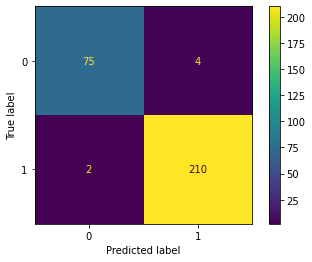

In [36]:
#confusion matrix
plot_confusion_matrix(my_pipe_correct_xgb, X_val, y_val);

In [37]:
data=pd.Series(my_pipe_correct_xgb.named_steps['model'].feature_importances_,X_train1.columns).sort_values(ascending=False)
data

time_to_home           0.371721
temperature_arr        0.319911
member_name            0.251988
first_arrive_time_h    0.056380
dtype: float32

In [38]:
def plot_feature_importances(model):
    n_features = X_train1_ss.shape[1]
    plt.figure(figsize=(10,8))
    #plt.bar(range(n_features),model.feature_importances_, align="center")
    plt.bar(range(n_features), my_pipe_correct_xgb.named_steps['model'].feature_importances_,align="center")
    plt.xticks(np.arange(n_features))
    plt.ylabel("importance")
    plt.xlabel("features")
    plt.title("Features Importances")
    plt.show()

In [39]:
# retrieving the RF Classifier from the model pipeline
clf = my_pipe_correct_xgb[-1]
# making a pandas dataframe
data = list(zip(X_train1.columns, clf.feature_importances_))

df_importances = pd.DataFrame(data, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False).head(9)
df_importances

,Feature,Importance
2,time_to_home,0.371721
1,temperature_arr,0.319911
0,member_name,0.251988
3,first_arrive_time_h,0.056380


<Figure size 576x432 with 0 Axes>

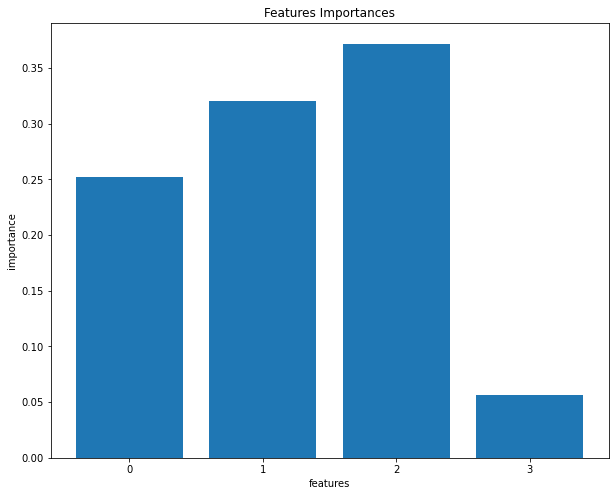

In [40]:
plt.figure(figsize=(8,6))
plot_feature_importances(df_importances)

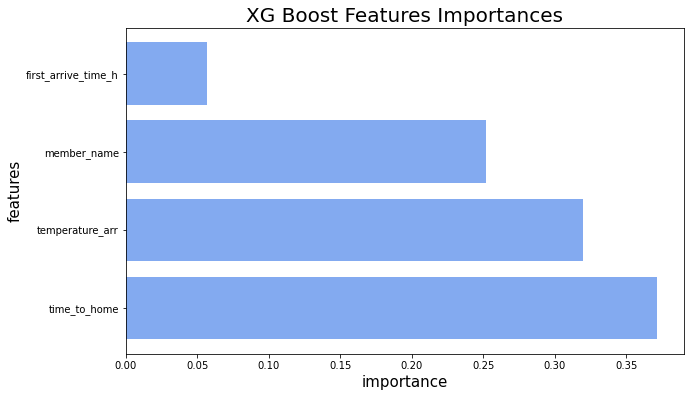

In [41]:
plt.figure(figsize=(10,6))
plt.rcParams["axes.grid"] = False

plt.barh(df_importances['Feature'], df_importances['Importance'], data=df_importances, align="center", color='cornflowerblue', alpha=0.8)
plt.xlabel("importance", size=15)
plt.ylabel("features", size=15)
plt.title("XG Boost Features Importances", size=20)
plt.show()

In [42]:
# Save the pipeline
joblib.dump(my_pipe_correct_xgb, 'thermostat_pipeline.pkl')

['thermostat_pipeline.pkl']

**Conclusion**
- 3 models: Logistic Regression, Random Forest and XG Boosting were run
- The best F1-Score was reached with XG Boosting model - 98%
- The most important variables were found and visualized

**Next steps**
- To use this model for different dataset 
- The final dataset looks pretty simple it means we need to improve the quality and quantity of our dataset

